In [1]:
import pandas as pd
import numpy as np
import json
import tweepy
import requests
import time
import matplotlib.pyplot as plt
import re

pd.set_option('max_colwidth',-1)

## Gather ##

In [2]:
#读取csv 文件
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#读取 tsv 
image = pd.read_csv('image-predictions.tsv',sep='\t')

In [3]:
#从网页下载数据
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
#保存到文件夹
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [5]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
df_list = []

start = time.time()

for i in archive['tweet_id']:
    try:
        tweet = api.get_status(i, tweet_mode='extended')
        df_list.append(tweet._json)
        
    except tweepy.TweepError as e:
        print (i, ":", e)
        
end = time.time()
print(end - start)

In [ ]:
with open('tweet_json.txt','w') as out_file:
    for i in df_list:
        json.dump(i, out_file)
        out_file.write('\n')

In [4]:
#读取txt 文件
tweet = pd.read_json('tweet_json.txt',lines=True,encoding = 'utf-8')
tweet.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [5]:
#选择需要的列
tweets = tweet[['id','retweet_count','favorite_count']]
tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


In [6]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [7]:
archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [7]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
archive[archive.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\r\n\r\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https://twitter.com/dog_rates/status/842765311967449089/photo/1,https://twitter.com/dog_rates/status/842765311967449089/photo/1",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053273591808/photo/1,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1",12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position\r\n11/10 https://t.co/7CQkn3gHOQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264096874500/photo/1,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,d

In [10]:
archive.name.value_counts()

None            745
a               55 
Charlie         12 
Oliver          11 
Cooper          11 
Lucy            11 
Tucker          10 
Penny           10 
Lola            10 
Winston         9  
Bo              9  
the             8  
Sadie           8  
an              7  
Bailey          7  
Buddy           7  
Daisy           7  
Toby            7  
Scout           6  
Jack            6  
Bella           6  
Stanley         6  
Jax             6  
Oscar           6  
Koda            6  
Dave            6  
Rusty           6  
Milo            6  
Leo             6  
Phil            5  
               ..  
Bones           1  
Tedrick         1  
Winifred        1  
Tobi            1  
Carper          1  
Flurpson        1  
Lillie          1  
Harry           1  
Wiggles         1  
Gòrdón          1  
Sojourner       1  
Farfle          1  
Emmie           1  
Leonidas        1  
Darrel          1  
Zoe             1  
Genevieve       1  
Brockly         1  
Lipton          1  


In [11]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [12]:
archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [13]:
#找到name列为小写的数据
archive.loc[(archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \r\n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \r\nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com

In [14]:
len(archive.loc[(archive['name'].str.islower())])

109

In [15]:
#text中包含狗的名字的数据 named
archive.loc[(archive['name'].str.islower())&(archive['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10,10,a,None,None,None,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow!

In [16]:
len(archive.loc[(archive['name'].str.islower())&(archive['text'].str.contains('named'))])

20

In [17]:
#text中包含狗的名字的数据 name is
archive.loc[(archive['name'].str.islower())&(archive['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,my,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8,10,a,None,None,None,None


In [18]:
len(archive.loc[(archive['name'].str.islower())&(archive['text'].str.contains('name is'))])

2

In [22]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [24]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [25]:
tweets.tail()

,id,retweet_count,favorite_count
2347,666049248165822465,41,111
2348,666044226329800704,147,309
2349,666033412701032449,47,128
2350,666029285002620928,48,132
2351,666020888022790149,530,2528


In [26]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [27]:
tweets.describe()

,id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


# Quality #
## archive ##
・错误的数据类型 : 'tweet_id''timestamp' 

・Rating （评分） 包含不准确数据，查找更新，合并分子分母用rating来表示它们的比例

・包含了retweets ，在分析中不需要 : 
      先将 retweeted_status_id 不为空的所有行删除，若这一列数据全部为空，删除掉整列
      'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'，'in_reply_to_status_id','in_reply_to_user_id' 

・Source列包含不需要的内容  

・Name列包含不正确的数据 (eg. 'a','the','an'，None...)  

・需要删除无图片数据
## tweets ##
・错误的数据类型 :tweet_id 

## image ##
・错误的数据类型 :id  

・p1 & p2 & p3的数据首字母大小写不统一，p2和p3的内容在分析中似乎不必要


# Tidiness #
## archive ##
・狗的地位分为4列，要整合在一列 

・把tweets和image合并到archive   


# Clean #

In [8]:
archive_clean = archive.copy()
tweets_clean = tweets.copy()
image_clean = image.copy()

In [9]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Define ###

・包含了retweets ，在分析中不需要，应删除 :
['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']


### Code ###

In [10]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.in_reply_to_user_id.isnull()]

In [11]:
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

### Test ###

In [12]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 139.3+ KB


### Define ###

狗的地位分为4列，要整合在一列

### Code ###

In [21]:
def get_stages(row):
    stages = []
    all_stages = ['doggo','floofer','pupper','puppo']
    for i in all_stages:
        if row[i] != 'None':
            stages.append(i)
            
    return ','.join(sorted(stages))

archive_clean['dog_stage'] = archive_clean[['doggo','floofer','pupper','puppo']].apply(get_stages, axis=1)

In [22]:
archive_clean =  archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

In [23]:
archive_clean['dog_stage'] = archive_clean['dog_stage'].astype('category')

### Test ###

In [24]:
archive_clean.dog_stage.value_counts()

                 1761
pupper           221 
doggo            72  
puppo            23  
floofer          9   
doggo,pupper     9   
doggo,puppo      1   
doggo,floofer    1   
Name: dog_stage, dtype: int64

In [25]:
archive_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1567,687826841265172480,2016-01-15 02:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louis. He's a rollercoaster of emotions. Incalculably fluffy. 12/10 would pet firmly https://t.co/17RGvOZO9P,"https://twitter.com/dog_rates/status/687826841265172480/photo/1,https://twitter.com/dog_rates/status/687826841265172480/photo/1,https://twitter.com/dog_rates/status/687826841265172480/photo/1,https://twitter.com/dog_rates/status/687826841265172480/photo/1",12,10,Louis,
1340,704859558691414016,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,https://twitter.com/dog_rates/status/704859558691414016/photo/1,10,10,a,pupper
1530,690021994562220032,2016-01-21 04:03:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Geoff (pronounced ""Kyle""). He accidentally opened the front facing camera. 10/10 https://t.co/TmlwQWnmRC",https://twitter.com/dog_rates/status/690021994562220032/photo/1,10,10,Geoff,
17,888804989199671297,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,"https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://twitter.com/dog_rates/status/888804989199671297/photo/1",13,10,Zeke,
1143,727314416056803329,2016-05-03 01:50:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper was about to explain where that dirt came from but then decided against it. 11/10 https://t.co/SbaelU6zRs,"https://twitter.com/dog_rates/status/727314416056803329/photo/1,https://twitter.com/dog_rates/status/727314416056803329/photo/1,https://twitter.com/dog_rates/status/727314416056803329/photo/1",11,10,None,pupper
1064,740995100998766593,2016-06-09 19:52:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Leo. He's a vape god. Blows o's for days. Probably drives a Subaru. Definitely owns multiple fedoras. 10/10 https://t.co/nt2x3fHaRJ,https://twitter.com/dog_rates/status/740995100998766593/photo/1,10,10,Leo,
2049,671504605491109889,2015-12-01 01:42:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He was just informed that dogs can't be Jedi. 11/10 https://t.co/mGW5c50mPA,"https://twitter.com/dog_rates/status/671504605491109889/photo/1,https://twitter.com/dog_rates/status/671504605491109889/photo/1",11,10,Charlie,
1543,689557536375177216,2016-01-19 21:18:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Downright majestic af 12/10 https://t.co/WFh2FEbYzj,https://twitter.com/dog_rates/status/689557536375177216/photo/1,12,10,None,
1944,673708611235921920,2015-12-07 03:40:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Riley. She's just an adorable football fan. 12/10 I'd watch the sports with her https://t.co/kLV8zUCfc8,https://twitter.com/dog_rates/status/673708611235921920/photo/1,12,10,Riley,
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,


### Define ###
把tweets和image合并到archive

### Code ###

In [26]:
tweets_clean =  tweets_clean.rename(columns={'id':'tweet_id','retweet_count':'retweet_count','favorite_count':'favorite_count'})

In [27]:
archive_clean = archive_clean.merge(tweets_clean, on='tweet_id', how='inner')

In [28]:
archive_clean = archive_clean.merge(image_clean, on='tweet_id', how='inner')

### Test ###

In [29]:
archive_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1440,676975532580409345,2015-12-16 04:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. He doesn't know how cheese works. Likes the way it feels on his face. Cheeky tongue slip. 11/10 https://t.co/j1zczS0lI5,https://twitter.com/dog_rates/status/676975532580409345/photo/1,11,10,Cooper,,1196,...,1,malamute,0.363257,True,Siberian_husky,0.245862,True,Eskimo_dog,0.125547,True
1043,704347321748819968,2016-02-29 16:47:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ralphson. He's very confused. Wondering why he's sitting on Santa's lap in February. 10/10 stay woke pupper https://t.co/INphk4ltkZ,https://twitter.com/dog_rates/status/704347321748819968/photo/1,10,10,Ralphson,pupper,390,...,1,teddy,0.233378,False,feather_boa,0.088474,False,Brittany_spaniel,0.082917,True
80,873213775632977920,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\r\n\r\nhttps://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1",12,10,Sierra,pupper,1656,...,1,vizsla,0.619782,True,bloodhound,0.338069,True,Chesapeake_Bay_retriever,0.012676,True
999,707969809498152960,2016-03-10 16:42:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Rufus. He's a Honeysuckle Firefox. Curly af. Badass tie. About to go on his first date ever 11/10 good luck pup https://t.co/dGoTWNfIsm,https://twitter.com/dog_rates/status/707969809498152960/photo/1,11,10,Rufus,,1090,...,1,toy_poodle,0.908491,True,miniature_poodle,0.082652,True,teddy,0.005786,False
368,813112105746448384,2016-12-25 20:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Toby. He's pupset because his hat isn't big enough. Christmas is ruined. 12/10 it'll be ok Toby https://t.co/zfdaGZlweq,https://twitter.com/dog_rates/status/813112105746448384/photo/1,12,10,Toby,,3208,...,1,dingo,0.287369,False,Pembroke,0.140682,True,basenji,0.090819,True
143,857029823797047296,2017-04-26 00:33:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeke. He performs group cheeky wink tutorials. Pawfect execution here. 12/10 would wink back https://t.co/uMH5CLjXJu,"https://twitter.com/dog_rates/status/857029823797047296/photo/1,https://twitter.com/dog_rates/status/857029823797047296/photo/1",12,10,Zeke,,4342,...,2,golden_retriever,0.968623,True,Labrador_retriever,0.010325,True,Saluki,0.004148,True
1901,667188689915760640,2015-11-19 03:52:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Quite an advanced dog here. Impressively dressed for canine. Has weapon. About to take out trash. 10/10 good dog https://t.co/8uCMwS9CbV,https://twitter.com/dog_rates/status/667188689915760640/photo/1,10,10,None,,447,...,1,vacuum,0.335830,False,swab,0.265278,False,toilet_tissue,0.140703,False
402,805932879469572096,2016-12-06 00:32:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Major. He put on a tie for his first real walk. Only a little crooked. Can also drool upwards. H*ckin talented. 12/10 https://t.co/Zcwr8LgoO8,https://twitter.com/dog_rates/status/805932879469572096/photo/1,12,10,Major,,2195,...,1,Norwegian_elkhound,0.657967,True,keeshond,0.319136,True,Leonberg,0.007947,True
68,877201837425926144,2017-06-20 16:29:50 +0000,"<a href=""http://twi

In [30]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null category
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null flo

### Define ###

Name列包含不正确的数据 (eg. 'a','the','an'，None...)

### Code ###

In [31]:
#找到name小写的行
archive_clean['name'].str.islower().value_counts()

False    1873
True     98  
Name: name, dtype: int64

In [32]:
#text中存在 named 或者 name is的数据
named = archive_clean.loc[(archive_clean['name'].str.islower())&(archive_clean['text'].str.contains('named'))]
name_is = archive_clean.loc[(archive_clean['name'].str.islower())&(archive_clean['text'].str.contains('name is'))]
no_name = archive_clean.loc[(archive_clean['name'].str.islower())]

In [33]:
#把text存到list
named_l = named['text'].tolist()
name_is_l = name_is['text'].tolist()
no_name_l = no_name['text'].tolist()

In [34]:
#提取text中的name，更新nema列
for i in named_l:
    w = archive_clean.text == i
    name_column = 'name'
    archive_clean.loc[w,name_column] = re.findall(r"named\s(\w+)", i)

In [35]:
for i in name_is_l:
    w = archive_clean.text == i
    name_column = 'name'
    archive_clean.loc[w,name_column] = re.findall(r"name is\s(\w+)",i)

In [36]:
for i in no_name_l:
    w = archive_clean.text ==i
    name_column = 'name'
    archive_clean.loc[w,name_column] = "None"

### Test ###

In [37]:
archive_clean['name'].str.islower().value_counts()

False    1971
Name: name, dtype: int64

In [38]:
archive_clean.name.value_counts()

None         622
Charlie      11 
Oliver       10 
Cooper       10 
Lucy         10 
Tucker       9  
Penny        9  
Winston      8  
Sadie        8  
Daisy        7  
Lola         7  
Toby         7  
Koda         6  
Bo           6  
Stanley      6  
Jax          6  
Bella        6  
Dave         5  
Oscar        5  
Milo         5  
Buddy        5  
Bailey       5  
Chester      5  
Leo          5  
Rusty        5  
Louis        5  
Scout        5  
Larry        4  
Jack         4  
Dexter       4  
            ..  
Goliath      1  
Emmy         1  
Farfle       1  
Kaia         1  
Tommy        1  
Paull        1  
Trevith      1  
Meatball     1  
Devón        1  
Trip         1  
Gert         1  
Pupcasso     1  
Patch        1  
Freddery     1  
Carter       1  
Davey        1  
Harper       1  
Tedders      1  
Tobi         1  
Tycho        1  
Fabio        1  
Tess         1  
Laika        1  
Sprout       1  
Remus        1  
Bookstore    1  
Eve          1  
Mo           1

### Define ###
Source列包含不需要的内容，刪除简化

### Code ###

In [39]:
archive_clean.source = archive_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')
archive_clean.source = archive_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
archive_clean.source = archive_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

### Test ###

In [40]:
archive_clean.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

### Define ###
p1 & p2 & p3的数据首字母大小写不统一，p2和p3的内容在分析中似乎不必要

### Code ###

In [41]:
#首字母大写
archive_clean.p1 = archive_clean.p1.str.capitalize()
archive_clean.p2 = archive_clean.p2.str.capitalize()
archive_clean.p3 = archive_clean.p3.str.capitalize()

### Test ###

In [42]:
archive_clean.p1.str.islower().value_counts()

False    1971
Name: p1, dtype: int64

In [43]:
archive_clean.p2.str.islower().value_counts()

False    1971
Name: p2, dtype: int64

In [44]:
archive_clean.p3.str.islower().value_counts()

False    1971
Name: p3, dtype: int64

### Define ###
Rating （评分） 包含不准确数据，查找更新，合并分子分母用rating来表示它们的比例


### Code ###

In [45]:
archive_clean.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
9       150
8       95 
7       52 
5       33 
14      33 
6       32 
3       19 
4       16 
2       9  
1       5  
1776    1  
24      1  
26      1  
420     1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      1  
80      1  
84      1  
88      1  
99      1  
121     1  
144     1  
165     1  
204     1  
0       1  
Name: rating_numerator, dtype: int64

In [46]:
archive_clean.rating_denominator.value_counts()

10     1954
50     3   
80     2   
11     2   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
7      1   
2      1   
Name: rating_denominator, dtype: int64

In [47]:
#匹配找出text中出现两个及以上分母的行
fix_rating = archive_clean[archive_clean.text.str.contains(r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

c:\users\19156\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [48]:
fix_rating

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
551,777684233540206592,2016-09-19 01:42:24 +0000,Twitter for iPhone,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,None,,3390,...,1,Cocker_spaniel,0.253442,True,Golden_retriever,0.162850,True,Otterhound,0.110921,True
745,747600769478692864,2016-06-28 01:21:27 +0000,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,,615,...,1,Chesapeake_bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
794,740373189193256964,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,,15029,...,3,Golden_retriever,0.807644,True,Kuvasz,0.101286,True,Labrador_retriever,0.023785,True
884,722974582966214656,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,,1754,...,1,Great_dane,0.246762,True,Greater_swiss_mountain_dog,0.126131,True,Weimaraner,0.085297,True
918,716439118184652801,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,,246,...,1,Siberian_husky,0.396495,True,Malamute,0.317053,True,Eskimo_dog,0.273419,True
934,714258258790387713,2016-03-28 01:10:13 +0000,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\r\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10,10,Travis,,805,...,1,Collie,0.176758,True,Chesapeake_bay_retriever,0.101834,True,Beagle,0.101294,True
1052,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9,10,Socks,,429,...,1,Border_collie,0.894842,True,Collie,0.097364,True,English_springer,0.003037,True
1141,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,None,,680,...,1,Seat_belt,0.522211,False,Sunglasses,0.077552,False,Ice_lolly,0.051774,False
1145,694352839993344000,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",10,10,Oliviér,,696,...,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,Silky_terrier,0.108404,True
1179,691483041324204033,2016-01-25 04:49:38 +0000,Twit

In [49]:
#保存到list
fix_rating_l = ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
'This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [50]:
#提取text中的第二个分数的分子，然后更新分子，分母改为10 
for i in fix_rating_l:
    w = archive_clean.text == i
    cnum = 'rating_numerator'
    cdeno = 'rating_denominator'
    archive_clean.loc[w,cnum] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", i)
    archive_clean.loc[w,cdeno] = 10

### Test ###


In [51]:
archive_clean[archive_clean.text.isin(fix_rating_l)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
794,740373189193256964,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,None,,15029,...,3,Golden_retriever,0.807644,True,Kuvasz,0.101286,True,Labrador_retriever,0.023785,True
884,722974582966214656,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,None,,1754,...,1,Great_dane,0.246762,True,Greater_swiss_mountain_dog,0.126131,True,Weimaraner,0.085297,True
918,716439118184652801,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,,246,...,1,Siberian_husky,0.396495,True,Malamute,0.317053,True,Eskimo_dog,0.273419,True
1313,682962037429899265,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,,18393,...,1,Dingo,0.278600,False,Chihuahua,0.155207,True,Loupe,0.153598,False


### Code ###

In [52]:
#匹配存在小数的评分
fix_rating1 = archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]
fix_rating1

c:\users\19156\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
39,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,,10336,...,1,Golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,Kuvasz,0.005501,True
499,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,,7033,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,Chow,0.102654,True
549,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,pupper,1867,...,1,Clumber,0.946718,True,Cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1359,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,,542,...,1,Kuvasz,0.438627,True,Samoyed,0.111622,True,Great_pyrenees,0.064061,True


In [53]:
fix_text_l = fix_rating1['text'].tolist()

In [54]:
for i in fix_text_l:
    w = archive_clean.text == i
    cnum = 'rating_numerator'
    cdeno = 'rating_denominator'
    archive_clean.loc[w,cnum] = re.findall(r"(\d+\.\d*)", i)
    archive_clean.loc[w,cdeno] = 10

In [55]:
#更新数据类型
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype('float')
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype('float')

In [56]:
#合并分子分母用rating来表示它们的比例
archive_clean['ratings'] = archive_clean.rating_numerator/archive_clean.rating_denominator

### Test ###

In [57]:
archive_clean[archive_clean.text.isin(fix_text_l)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings
39,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,,10336,...,Golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,Kuvasz,0.005501,True,1.350
499,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,,7033,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,Chow,0.102654,True,0.975
549,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,pupper,1867,...,Clumber,0.946718,True,Cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1.127
1359,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,None,,542,...,Kuvasz,0.438627,True,Samoyed,0.111622,True,Great_pyrenees,0.064061,True,1.126


In [58]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,,8842,...,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,,6480,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,,4301,...,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,,8925,...,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,,9721,...,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2


In [59]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 23 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1971 non-null object
dog_stage             1971 non-null category
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null

### Define ###
存在错误的数据类型，更改数据类型

### Code ###

In [60]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean['source'] = archive_clean['source'].astype('category')
archive_clean['text'] = archive_clean['text'].astype('str')


### Test ###

In [61]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 23 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null category
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1971 non-null object
dog_stage             1971 non-null category
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               19

In [62]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,,8842,...,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,,6480,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,,4301,...,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,,8925,...,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,,9721,...,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2


## Store ##


In [63]:
archive_clean.to_csv('twitter_archive_master.csv')

## Analyzing ##


In [64]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
#读取文件
df =pd.read_csv('twitter_archive_master.csv').drop(['Unnamed: 0'],axis=1)

In [66]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'ratings'],
      dtype='object')

In [87]:
anadf = df[['tweet_id', 'timestamp', 'retweet_count', 'favorite_count', 'ratings', 'p1', 'p1_conf']].copy()

In [88]:
len(anadf.p1.value_counts())

373

通过统计推文p1的预测来得出该统计中狗的品种为378种，狗的品种真的好多啊，那么我们将通过得出数量前十位的通过转发量，点赞数和评分来得到最有人气的狗狗品种。

In [96]:
top10_vc = anadf.p1.value_counts().head(10).index
top10_vc

Index(['Golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Pug', 'Chow', 'Samoyed', 'Toy_poodle', 'Pomeranian', 'Cocker_spaniel'],
      dtype='object')

In [97]:
top10_vcdog =  anadf.loc[anadf.p1.isin(top10_vc)]
top10_vcdog.head()

,tweet_id,timestamp,retweet_count,favorite_count,ratings,p1,p1_conf
1,892177421306343426,2017-08-01 00:17:27,6480,33786,1.3,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,4301,25445,1.2,Chihuahua,0.716012
7,890729181411237888,2017-07-28 00:22:40,19548,66596,1.3,Pomeranian,0.566142
9,890240255349198849,2017-07-26 15:59:51,7684,32467,1.4,Pembroke,0.511319
10,890006608113172480,2017-07-26 00:31:25,7584,31127,1.3,Samoyed,0.957979


In [98]:
top10_vcdog.p1.value_counts()

Golden_retriever      150
Labrador_retriever    100
Pembroke              88 
Chihuahua             83 
Pug                   57 
Chow                  44 
Samoyed               43 
Toy_poodle            39 
Pomeranian            38 
Cocker_spaniel        30 
Name: p1, dtype: int64

In [99]:
mean = top10_vcdog.groupby(top10_vcdog['p1']).mean().sort_values('favorite_count')

In [100]:
mean

,tweet_id,retweet_count,favorite_count,ratings,p1_conf
p1,,,,,
Pug,7.187419e+17,1969.192982,5598.228070,1.031579,0.757663
Toy_poodle,7.132404e+17,2458.153846,6446.410256,1.112821,0.607713
Pomeranian,7.197643e+17,2863.105263,8103.210526,1.115132,0.743606
Chihuahua,7.276720e+17,3646.000000,8120.325301,1.080723,0.586888
Chow,7.549328e+17,3012.863636,9413.409091,1.163636,0.588455
Cocker_spaniel,7.602332e+17,4076.933333,10489.833333,1.140000,0.531644
Labrador_retriever,7.511971e+17,4249.540000,11195.550000,1.113000,0.666523
Pembroke,7.560529e+17,3170.170455,11270.022727,1.144318,0.717223
Golden_retriever,7.593751e+17,3891.846667,11382.226667,1.179190,0.723555


对每个品种的狗的转发量，点赞数，评分求平均数，然后进行排序。

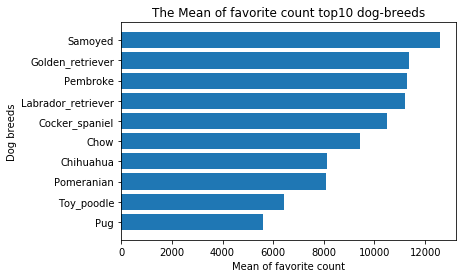

In [101]:
x = mean.index
y1 = mean['favorite_count']

plt.barh(x, y1, data=mean)
plt.xlabel('Mean of favorite count')
plt.ylabel('Dog breeds')
plt.title('The Mean of favorite count top10 dog-breeds');

这幅图可以看出获得平均点赞数最高的品种是萨摩耶。

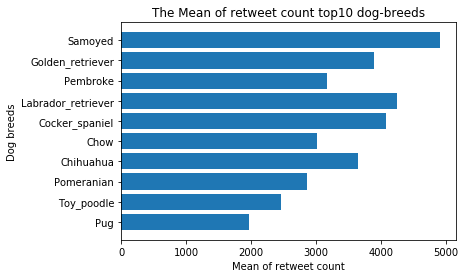

In [102]:
x = mean.index
y1 = mean['retweet_count']

plt.barh(x, y1, data=mean)
plt.xlabel('Mean of retweet count')
plt.ylabel('Dog breeds')
plt.title('The Mean of retweet count top10 dog-breeds');

同样可以看出萨摩耶的平均转发数是最高的。

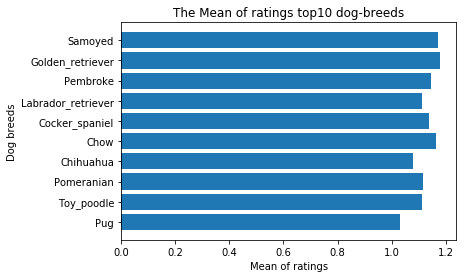

In [103]:
x = mean.index
y1 = mean['ratings']
plt.barh(x, y1, data=mean)
plt.xlabel('Mean of ratings')
plt.ylabel('Dog breeds')
plt.title('The Mean of ratings top10 dog-breeds');

平均评级中最高的还是萨摩耶哟。

根据上面的统计数据和图表，我们可以看到萨摩耶拥有最多的平均转推次数和最多点赞数。所以可以说萨摩耶是最有人气的品种。

萨摩耶憨憨样子真的很可爱，但是它是一直都有这么高的人气吗？那么接下来我们来看看大家对萨摩耶的好感度呈现什么样的变化趋势吧。

首先提取出来推文中关于萨摩耶的所有数据，然后绘制散点图。

In [104]:
samoyed = anadf[anadf['p1'] == 'Samoyed']

我认为并不需要精确到分秒的时间，所以只把日期提取出来就好了。

In [105]:
samoyed.timestamp = pd.to_datetime(samoyed.timestamp)

c:\users\19156\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [106]:
samoyed['datetime'] = samoyed['timestamp'].map(lambda x: x.strftime('%Y-%m-%d'))
samoyed = samoyed.drop(['timestamp'],axis=1)

c:\users\19156\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
samoyed = samoyed.sort_values(by='datetime',ascending=True)

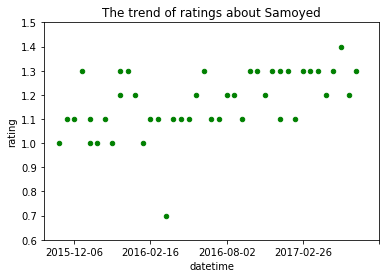

In [108]:
x = samoyed['datetime']
y = samoyed['ratings']

plt.scatter(x, y, s=20,c='g')
plt.xlabel('datetime')
plt.ylabel('rating')
plt.ylim([0.6,1.5])
plt.xticks(np.arange(2,44,10))
plt.title('The trend of ratings about Samoyed');

这是对萨摩耶的rating的变化图，rating是在前面我们计算出的分子分母的比例，整体变化不是很大平均都大于1，也就是说大家对它的评分大多超过10分呢。

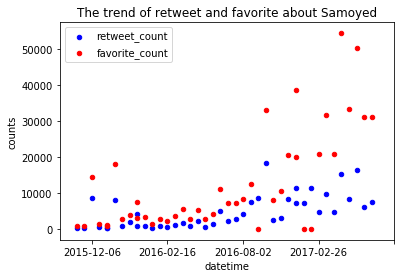

In [109]:
x = samoyed['datetime']
y1 = samoyed['retweet_count']
y2 = samoyed['favorite_count']

plt.scatter(x, y1, s=20,c='b')
plt.scatter(x, y2, s=20,c='r')
plt.xlabel('datetime')
plt.ylabel('counts')
plt.legend(loc='upper left')
plt.xticks(np.arange(2,44,10))
plt.title('The trend of retweet and favorite about Samoyed');

  这个是大家对萨摩耶转发量和点赞数量的变化趋势图，这个图可以更容易的看出从2015年开始到2017年之间，变化是明显增加的趋势，尤其点赞量的增长更加显著。
萨摩耶狗狗看起来好像永远在笑的样子，能给大家带来好心情，面对快节奏生活的压力的人们看到萨摩耶可爱的笑容会被瞬间治愈，它们又非常喜欢亲近人类，我认为这可能是萨摩耶越来越受大家喜爱的原因吧！